<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [21]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [23]:
##### Your Code Here #####
from sklearn.model_selection import train_test_split
X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, test_size=0.50, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10806, 1) (10807, 1) (10806,) (10807,)


In [24]:
# fit the model with training data

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# use model to predict with test data

model.predict(X_test)

array([535017.53176887, 757813.86573428, 991347.37242091, ...,
       443751.56363847, 459857.3227203 , 293431.14554133])

In [26]:
model.coef_, model.intercept_

(array([268.42931803]), -20631.156554487883)

In [27]:
X_test.shape

(10807, 1)

In [0]:
m = model.coef_
b = model.intercept_

line = (m * X_test) + b

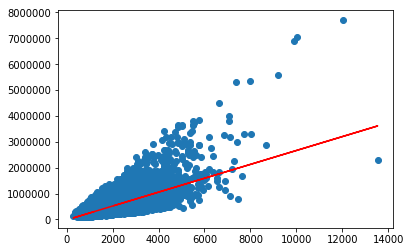

In [29]:
ax = plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, line, "-r");

In [30]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

275006.58926416625

In [31]:
r2_score(y_test, model.predict(X_test))

0.49226256935760826

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [32]:
##### Your Code Here #####

X2 = df[['sqft_living', "bedrooms"]]
y2 = df['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.50, test_size=0.50, random_state=42)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(10806, 2) (10807, 2) (10806,) (10807,)


In [33]:
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
intercept = model.intercept_
slopes = model.coef_
print(intercept, slopes)

111190.51860876026 [   304.72984939 -61633.19206584]


In [35]:
np.sqrt(mean_squared_error(y_test2, model.predict(X_test2)))

271767.19190504117

In [36]:
r2_score(y_test2, model.predict(X_test2))

0.5041537475260679

In [0]:
# not too sure about this but gonna try plotting a plane
from mpl_toolkits.mplot3d import Axes3D

In [0]:
x = X_test2.iloc[:, [0]]
y = X_test2.iloc[:, [1]]
z = y_test2

In [0]:
thing1 = np.multiply(slopes[0], x)
thing2 = np.multiply(slopes[1], y)

In [47]:
# Z = C[0]*X + C[1]*Y + C[2]

added = np.add(thing1, thing2)
plane = np.add(added, intercept)
plane.head()

,sqft_living
735,4.954485e+05
2830,6.867411e+05
4106,1.013489e+06
16218,1.315859e+06
19964,7.033521e+05


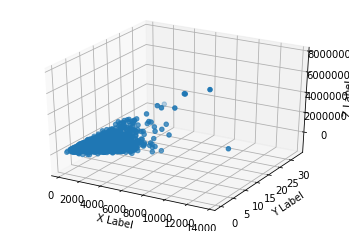

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x, ys=y, zs=z)
ax.plot_surface(x, y, plane, color="red", alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
df.dtypes

In [0]:
# drop date column for now since non-numeric

In [0]:
##### Your Code Here #####

X_all = df.drop(columns=['price', 'date'])
y_all = df['price']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, train_size=0.50, test_size=0.50, random_state=42)

print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

In [0]:
model = LinearRegression()
model.fit(X_all, y_all)

In [0]:
print(model.intercept_, model.coef_)

In [0]:
np.sqrt(mean_squared_error(y_test_all, model.predict(X_test_all)))

In [0]:
r2_score(y_test_all, model.predict(X_test_all))

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
